In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import seaborn as sns
from scipy.stats.mstats import winsorize

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.replace('Male',0, inplace = True)
df.replace('Female',1, inplace = True)
df.replace('Other',2, inplace = True)

In [7]:
#Data Preprocessing
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [8]:
print_unique_col_values(df)

ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [9]:
df.replace('Yes',1, inplace = True)
df.replace('No',0 , inplace = True)

In [10]:
print_unique_col_values(df)

work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [11]:
df.replace('Urban',1, inplace = True)
df.replace('Rural',0, inplace = True)

In [22]:
print_unique_col_values(df)

work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [24]:
df = pd.get_dummies(data=df, columns=['work_type','smoking_status'])

In [26]:
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0,67.0,0,1,1,1,228.69,36.6,1,False,False,True,False,False,False,True,False,False
1,51676,1,61.0,0,0,1,0,202.21,NaN,1,False,False,False,True,False,False,False,True,False
2,31112,0,80.0,0,1,1,0,105.92,32.5,1,False,False,True,False,False,False,False,True,False
3,60182,1,49.0,0,0,1,1,171.23,34.4,1,False,False,True,False,False,False,False,False,True
4,1665,1,79.0,1,0,1,0,174.12,24.0,1,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,1,83.75,NaN,0,False,False,True,False,False,False,False,True,False
5106,44873,1,81.0,0,0,1,1,125.20,40.0,0,False,False,False,True,False,False,False,True,False
5107,19723,1,35.0,0,0,1,0,82.99,30.6,0,False,False,False,True,False,False,False,True,False
5108,37544,0,51.0,0,0,1,0,166.29,25.6,0,False,False,True,False,False,False,True,False,False


In [28]:
df.isnull().sum()

id                                  0
gender                              0
age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
Residence_type                      0
avg_glucose_level                   0
bmi                               201
stroke                              0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [30]:
# delete id col => มันไม่จำเป็นต้องใช้
df = df.drop('id', axis=1)

In [32]:
bmi_missing_values = df['bmi'].isna().value_counts()
bmi_missing_values
print(f'{round(bmi_missing_values[1]/(bmi_missing_values[0] + bmi_missing_values[1])*100,3)} % of bmi data is missing')

3.933 % of bmi data is missing


9.099999999999998
47.5
21      48.9
113     56.6
254     50.1
258     54.6
270     60.9
        ... 
4858    47.6
4906    54.1
4952    56.6
5009    49.5
5057    47.6
Name: bmi, Length: 110, dtype: float64
bmi has 110 outliers 


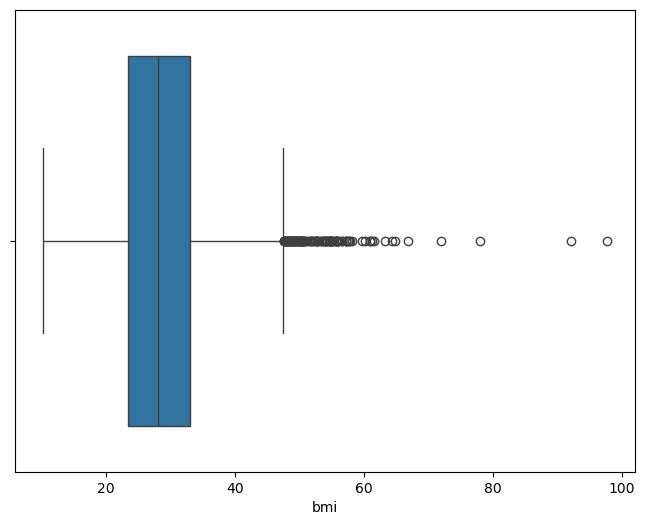

In [34]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_bmi = df[(df['bmi']<lower_bound) | (df['bmi']>upper_bound)]
if Outliers_bmi.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ bmi")
else:
    print(Outliers_bmi['bmi'])
    
plt.figure(figsize=(8,6))
sns.boxplot(x=df.bmi)
outliers = [val for val in df.bmi if (val < lower_bound or val > upper_bound) ] 
print("bmi doesn't have outliers") if len(outliers)==0 else print(f"bmi has {len(outliers)} outliers ")

In [35]:
# do fill null in bmi with median value
median = df.bmi.median()
df['bmi'] = df['bmi'].fillna(median)

<Axes: xlabel='bmi', ylabel='Count'>

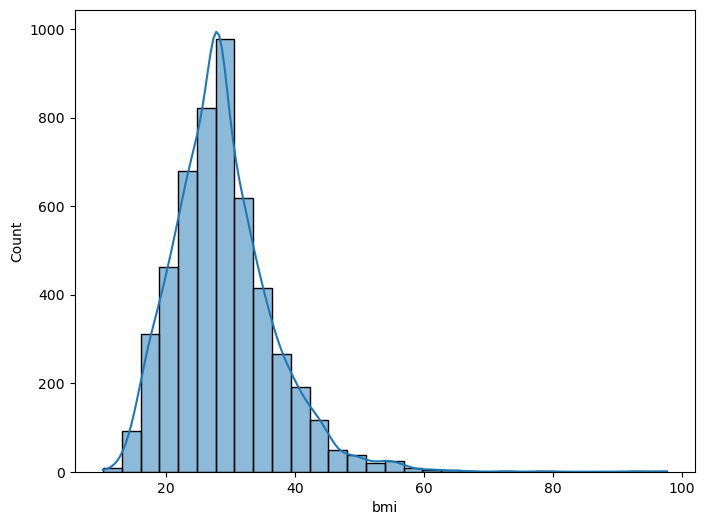

In [38]:
# สร้างฮิสโตแกรม
plt.figure(figsize=(8,6))
sns.histplot(df.bmi, bins=30, kde=True) 

In [40]:
df.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [44]:
df.drop_duplicates()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,1,228.69,36.6,1,False,False,True,False,False,False,True,False,False
1,1,61.0,0,0,1,0,202.21,28.1,1,False,False,False,True,False,False,False,True,False
2,0,80.0,0,1,1,0,105.92,32.5,1,False,False,True,False,False,False,False,True,False
3,1,49.0,0,0,1,1,171.23,34.4,1,False,False,True,False,False,False,False,False,True
4,1,79.0,1,0,1,0,174.12,24.0,1,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,1,83.75,28.1,0,False,False,True,False,False,False,False,True,False
5106,1,81.0,0,0,1,1,125.20,40.0,0,False,False,False,True,False,False,False,True,False
5107,1,35.0,0,0,1,0,82.99,30.6,0,False,False,False,True,False,False,False,True,False
5108,0,51.0,0,0,1,0,166.29,25.6,0,False,False,True,False,False,False,True,False,False


In [46]:
# ทำการ Winsorisation
Outliers_cleansing = winsorize(df['bmi'], limits = (0.05, 0.05))
replace_value = pd.DataFrame({
    'Original': df.loc[Outliers_bmi.index, 'bmi'],
    'Winsorized': Outliers_cleansing[Outliers_bmi.index]
})
print(replace_value)

df['bmi'] = Outliers_cleansing

      Original  Winsorized
21        48.9        42.7
113       56.6        42.7
254       50.1        42.7
258       54.6        42.7
270       60.9        42.7
...        ...         ...
4858      47.6        42.7
4906      54.1        42.7
4952      56.6        42.7
5009      49.5        42.7
5057      47.6        42.7

[110 rows x 2 columns]


bmi doesn't have outliers


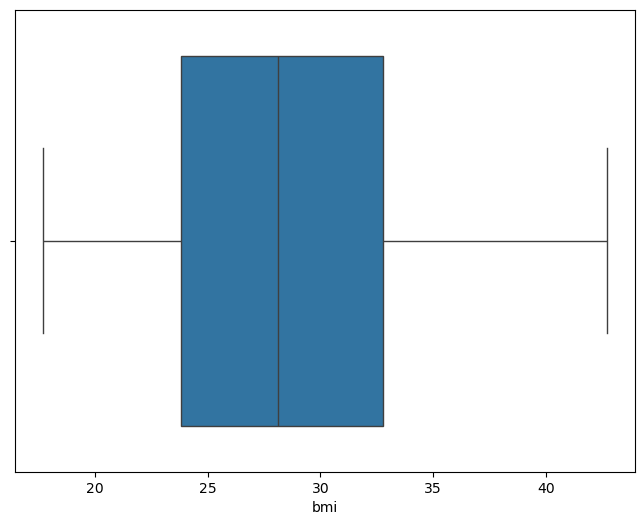

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df.bmi)
outliers = [val for val in df.bmi if (val < lower_bound or val > upper_bound) ] 
print("bmi doesn't have outliers") if len(outliers)==0 else print(f"bmi has {len(outliers)} outliers ")

21.977500000000006
169.35750000000002
21      233.29
113     224.10
254     210.95
258     205.84
270     129.54
         ...  
4858    100.88
4906     70.51
4952    211.83
5009    126.85
5057     69.92
Name: avg_glucose_level, Length: 110, dtype: float64
avg_glucose_level has 874 outliers 


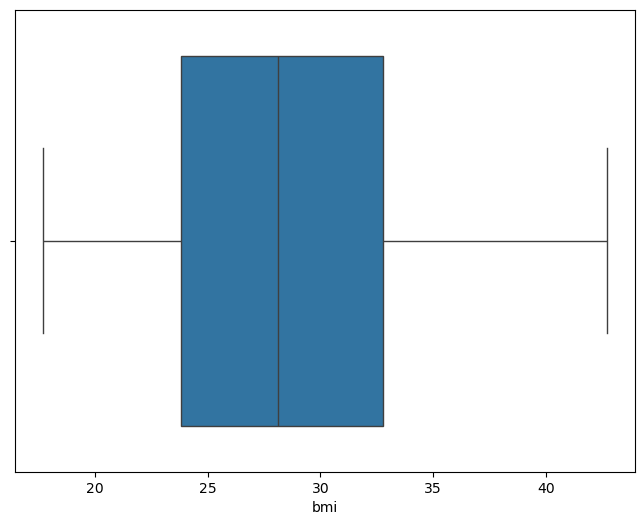

In [50]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_avg_glucose_level = df[(df['avg_glucose_level']<lower_bound) | (df['avg_glucose_level']>upper_bound)]
if Outliers_avg_glucose_level.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ avg_glucose_level")
else:
    print(Outliers_bmi['avg_glucose_level'])
plt.figure(figsize=(8,6))
sns.boxplot(x=df.bmi)
outliers = [val for val in df.bmi if (val < lower_bound or val > upper_bound) ] 
print("avg_glucose_level doesn't have outliers") if len(outliers)==0 else print(f"avg_glucose_level has {len(outliers)} outliers ")

In [52]:
# ทำการ Winsorisation
Outliers_cleansing = winsorize(df['avg_glucose_level'], limits = (0.05, 0.05))
replace_value = pd.DataFrame({
    'Original': df.loc[Outliers_bmi.index, 'avg_glucose_level'],
    'Winsorized': Outliers_cleansing[Outliers_bmi.index]
})
print(replace_value)

df['avg_glucose_level'] = Outliers_cleansing

      Original  Winsorized
21      233.29      216.38
113     224.10      216.38
254     210.95      210.95
258     205.84      205.84
270     129.54      129.54
...        ...         ...
4858    100.88      100.88
4906     70.51       70.51
4952    211.83      211.83
5009    126.85      126.85
5057     69.92       69.92

[110 rows x 2 columns]


avg_glucose_level has 874 outliers 


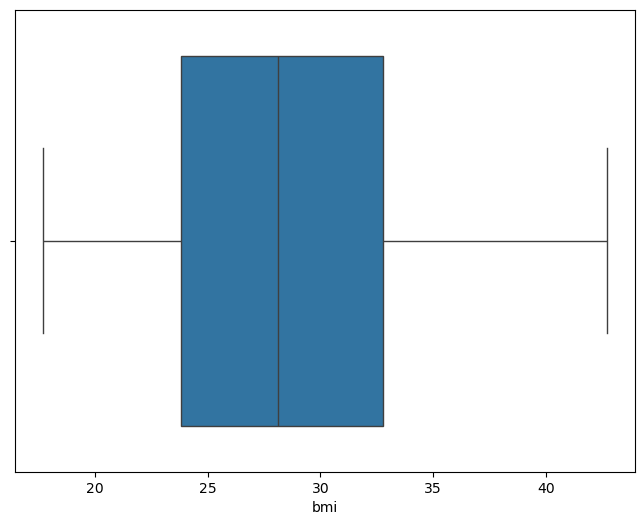

In [54]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df.bmi)
outliers = [val for val in df.bmi if (val < lower_bound or val > upper_bound) ] 
print("avg_glucose_level doesn't have outliers") if len(outliers)==0 else print(f"avg_glucose_level has {len(outliers)} outliers ")

In [56]:
# X,Y Train test split
X = df.drop('stroke',axis='columns')
y = testLabels = df.stroke.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
y_train.value_counts().sum()

3577

In [60]:
X_test.shape

(1533, 17)

In [62]:
y.value_counts()

stroke
0.0    4861
1.0     249
Name: count, dtype: int64

In [64]:
IR = 4861/249
print("ค่า Imbalance Ratio มีค่า = ",IR)

ค่า Imbalance Ratio มีค่า =  19.522088353413654


In [66]:
#วิธีการ SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [68]:
#USE DBSCAN
k = int(np.log(len(X_res)))
neighbors = NearestNeighbors(n_neighbors=k).fit(X_res)
distances, indices = neighbors.kneighbors(X_res)
eps = np.percentile(distances[:, k-1], 95)

In [70]:
# Apply DBSCAN to find and remove noise
dbscan = DBSCAN(eps=eps, min_samples=k).fit(X_res)
X_clean = X_res[dbscan.labels_ != -1]
y_clean = y_res[dbscan.labels_ != -1]

In [72]:
X_clean.shape

(6682, 17)

Text(0, 0.5, 'BMI')

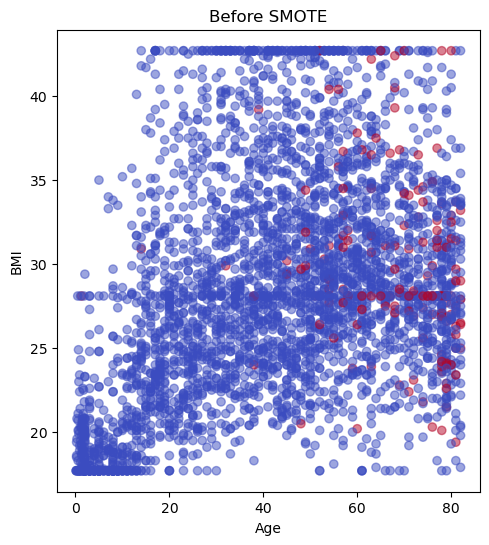

In [74]:
# การสร้าง scatter plot เพื่อแสดงการกระจายตัวของข้อมูลก่อนและหลัง SMOTE
plt.figure(figsize=(12,6))

# ข้อมูลก่อนใช้ SMOTE
plt.subplot(1, 2, 2)
plt.scatter(X_train['age'], X_train['bmi'], c=y_train, cmap='coolwarm', alpha=0.5)
plt.title('Before SMOTE')
plt.xlabel('Age')
plt.ylabel('BMI')



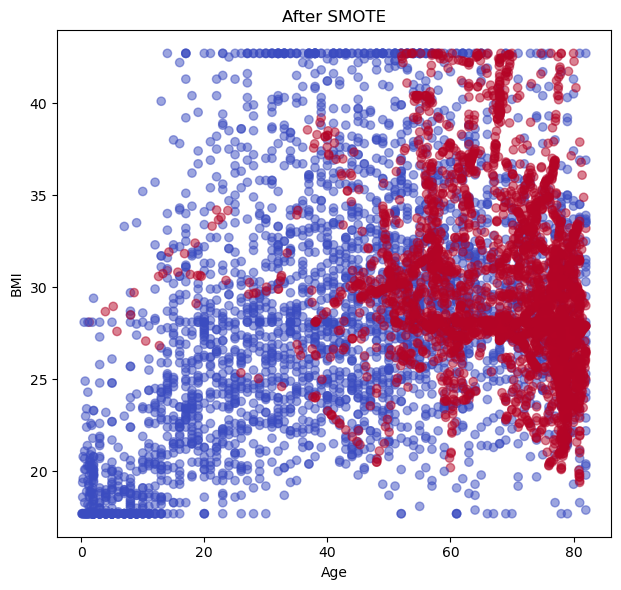

In [76]:
# ข้อมูลหลังใช้ SMOTE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(X_clean['age'], X_clean['bmi'], c=y_clean, cmap='coolwarm', alpha=0.5)
plt.title('After SMOTE')
plt.xlabel('Age')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
# Prepare function for model evaluation
def evaluate_model(model_name, y_val, y_pred, y_prob):
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {auc:.4f}")
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return accuracy, precision, recall, auc

Confusion Matrix:
[[1370   74]
 [  78   11]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1444
         1.0       0.13      0.12      0.13        89

    accuracy                           0.90      1533
   macro avg       0.54      0.54      0.54      1533
weighted avg       0.90      0.90      0.90      1533

Accuracy: 0.9008
Precision: 0.1294
Recall: 0.1236
AUC: 0.6192


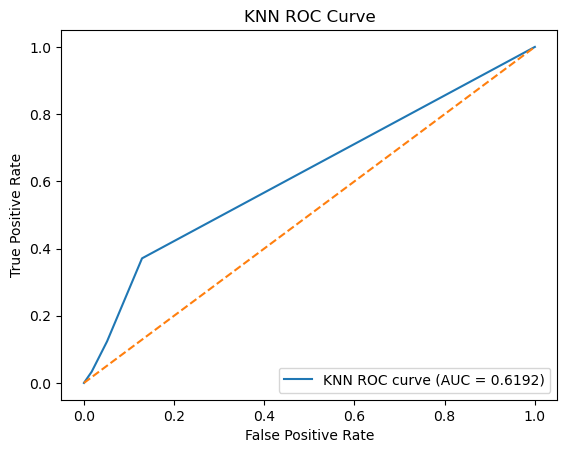

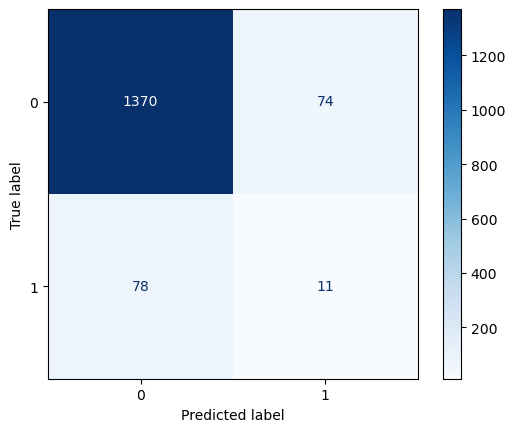

Best parameters found by GridSearchCV for KNN:
{'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Define the parameter grid for KNN
param_grid_knn = {'knn__n_neighbors': [3, 5, 7, 9],  # Number of neighbors to use
                  'knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
                  'knn__metric': ['euclidean', 'manhattan']}  # Distance metric

# Create a pipeline to scale the data and apply KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('knn', KNeighborsClassifier())  # KNeighborsClassifier model
])

# GridSearchCV with pipeline for KNN
grid_search_knn = GridSearchCV(pipeline, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_knn.fit(X_res, y_res)

# Predict and evaluate KNN
knn_best = grid_search_knn.best_estimator_
y_pred_knn = knn_best.predict(X_test)
y_prob_knn = knn_best.predict_proba(X_test)[:, 1]

# Print metrics (Assuming the same print_metrics function exists)
evaluate_model("KNN", y_test, y_pred_knn, y_prob_knn)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

# Print the best parameters for KNN
print("Best parameters found by GridSearchCV for KNN:")
print(grid_search_knn.best_params_)


Confusion Matrix:
[[1444    0]
 [  89    0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1444
         1.0       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

Accuracy: 0.9419
Precision: 0.0000
Recall: 0.0000
AUC: 0.4037


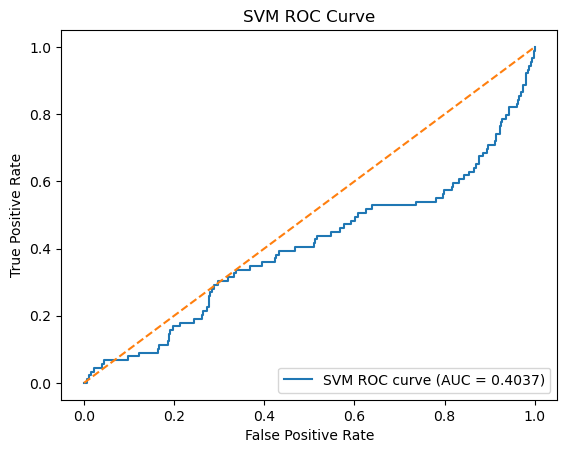

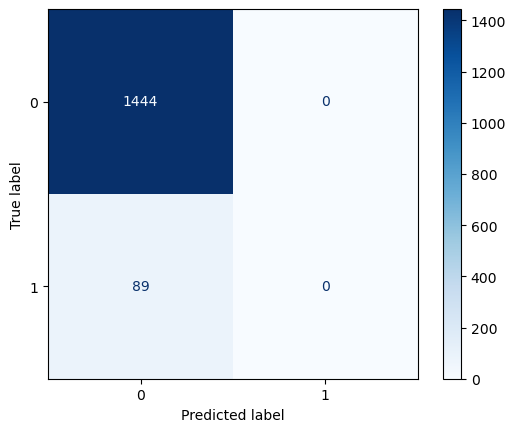

Best parameters found by GridSearchCV:
{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


In [95]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid for SVM
param_grid_svm = {'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale', 'auto'], 'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a pipeline to scale the data and apply SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('svc', SVC(probability=True))  # SVC model with probability=True
])

# GridSearchCV with pipeline
grid_search_svm = GridSearchCV(pipeline, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_svm.fit(X_train, y_train)

# Predict and evaluate SVM
svm_best = grid_search_svm.best_estimator_
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:, 1]

# Print metrics
evaluate_model("SVM", y_test, y_pred_svm, y_prob_svm)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search_svm.best_params_)

Confusion Matrix:
[[ 365 1079]
 [   0   89]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.25      0.40      1444
         1.0       0.08      1.00      0.14        89

    accuracy                           0.30      1533
   macro avg       0.54      0.63      0.27      1533
weighted avg       0.95      0.30      0.39      1533

Accuracy: 0.2962
Precision: 0.0762
Recall: 1.0000
AUC: 0.8219


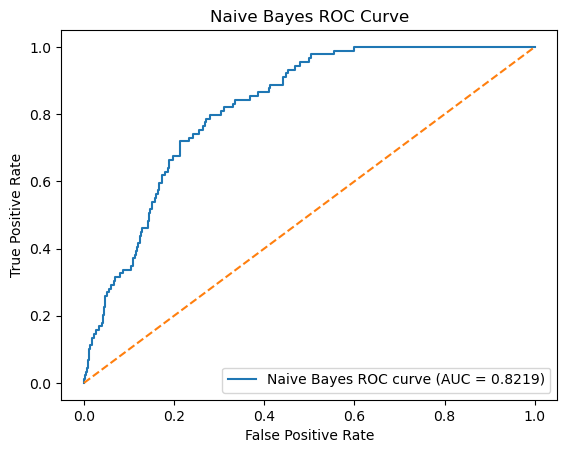

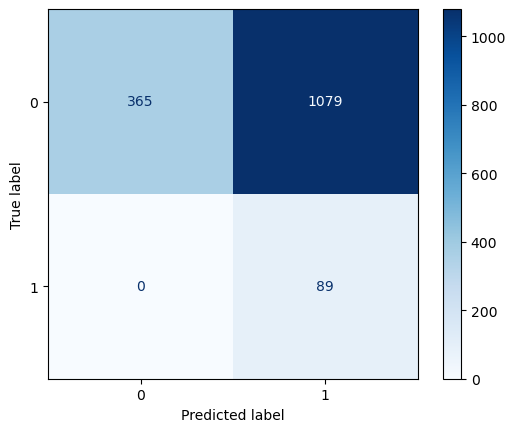

In [96]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Since GaussianNB does not have many hyperparameters to tune, we will just fit it in the pipeline
param_grid_nb = {}

# Create a pipeline to scale the data and apply GaussianNB
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('nb', GaussianNB())            # GaussianNB model
])

# GridSearchCV with pipeline (no parameter grid for Naive Bayes)
grid_search_nb = GridSearchCV(pipeline, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_nb.fit(X_train, y_train)

# Predict and evaluate Naive Bayes
nb_best = grid_search_nb.best_estimator_
y_pred_nb = nb_best.predict(X_test)
y_prob_nb = nb_best.predict_proba(X_test)[:, 1]

# Print metrics (Assuming the same print_metrics function exists)
evaluate_model("Naive Bayes", y_test, y_pred_nb, y_prob_nb)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()



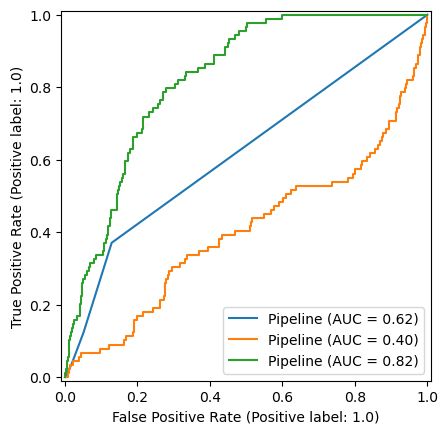

In [97]:
# ROC curve for all models
plt_roc = RocCurveDisplay.from_estimator(knn_best, X_test, y_test)
RocCurveDisplay.from_estimator(svm_best, X_test, y_test, ax=plt_roc.ax_)
RocCurveDisplay.from_estimator(nb_best, X_test, y_test, ax=plt_roc.ax_)
plt.show()